## Pokemon game analysis.

- The Dataset is about pokemon games. This Project is about studying and analyzing numerous pokemon from the popular gaming program Pokemon.   The Dataset contains numerous Pokemon metrics such as:  
  -Type  
  -HP  
  -Attack  
  -Defense  
  -Speed   
  -Sp. attack and Defense so forth. 
- The dataset is acquired from Kaggle site.   Python data science libraries such as numpy, pandas, matplotlib, and seaborn are utilized here.   The data will be rigorously examined beforehand, and any incorrect data will be eliminated before the analysis and results are shown.


### Questions to derive from the dataset
 1. What are the top 10 Pokemons as per Total points?
 2. What is the correlation between defense and attack, Sp Attack and Sp. Defense?.
 3. Which is the fastest pokemon?
 4. Which are the Top 10 pokemon (having highest Total) with Attack > 100, Defense > 100, HP > 50 and  are Legendary ?
 5. Popular Generation of pokemon?

In [72]:
#loading necessary libraries for analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [73]:
#loading the dataset
pokemon_df=pd.read_csv('Pokemon_dataset.csv', index_col=0)

pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [74]:
pokemon_df.shape

(800, 12)

#####  Our dataset comprises of 800 entries and 12 columns.

In [75]:
#displaying the columns
pokemon_df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Data wrangling and cleaning.


In [76]:
pokemon_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [77]:
#renaming column(s)
pokemon_df=pokemon_df.rename(columns={'Name':'Species', 'Type 1':'Type_1', 'Type 2':'Type_2'})

pokemon_df.head(3)


,Species,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [78]:
#reindexing the columns

pokemon_df=pokemon_df.reindex(columns=['Species', 'Type_1', 'Type_2', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 
                                      'HP', 'Total', 'Generation', 'Legendary'])

pokemon_df.head(3)

,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,49,49,45,65,65,45,318,1,False
2,Ivysaur,Grass,Poison,62,63,60,80,80,60,405,1,False
3,Venusaur,Grass,Poison,82,83,80,100,100,80,525,1,False


In [79]:
# checking for columns with missing values in the dataset

pokemon_df.isnull().sum()

Species         0
Type_1          0
Type_2        386
Attack          0
Defense         0
Speed           0
Sp. Atk         0
Sp. Def         0
HP              0
Total           0
Generation      0
Legendary       0
dtype: int64

Column(s) with missing values include:
  - Type 2 with 386   
- The following cell defines a function that will deal with the missing values. Deleting the empty records is not a option
    for dealing with missing values as this will distort our dataset. Therefore we shall key in N/A to indicate not   applicable or the name type was not specified.

In [80]:
# defining a function
def obj_fill(col):
    """function to fill missing values within non-numeric columns"""
    col.fillna('N/A',inplace=True)

In [81]:
#using the function to fill in null values in Type 2 col

obj_fill(pokemon_df['Type_2'])

In [82]:
#checking if the changes have reflected and no more null values

pokemon_df.isnull().sum()

Species       0
Type_1        0
Type_2        0
Attack        0
Defense       0
Speed         0
Sp. Atk       0
Sp. Def       0
HP            0
Total         0
Generation    0
Legendary     0
dtype: int64

In [83]:
#checking for duplicate values
pokemon_df.duplicated().any()

False

In [84]:
# Displaying the descriptive summary statictics of our data

pokemon_df.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,79.001250,73.842500,68.277500,72.820000,71.902500,69.258750,435.10250,3.32375
std,32.457366,31.183501,29.060474,32.722294,27.828916,25.534669,119.96304,1.66129
min,5.000000,5.000000,5.000000,10.000000,20.000000,1.000000,180.00000,1.00000
25%,55.000000,50.000000,45.000000,49.750000,50.000000,50.000000,330.00000,2.00000
50%,75.000000,70.000000,65.000000,65.000000,70.000000,65.000000,450.00000,3.00000
75%,100.000000,90.000000,90.000000,95.000000,90.000000,80.000000,515.00000,5.00000
max,190.000000,230.000000,180.000000,194.000000,230.000000,255.000000,780.00000,6.00000


- Key Inisghts from the descriptive summary statistics:
      - Maximum attained speed is 180.
      - Lowest Hit points one can have is 1.
      - Highest score is 780.

### Exploratory Data analysis and Visualization

### Descriptive Analysis.

In [85]:
#counting number of pokemons each type 1 has:
pokemon_df['Type_1'].value_counts()


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type_1, dtype: int64

In [86]:
#counting number of pokemons each type 1 has:
pokemon_df['Type_2'].value_counts()


N/A         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type_2, dtype: int64

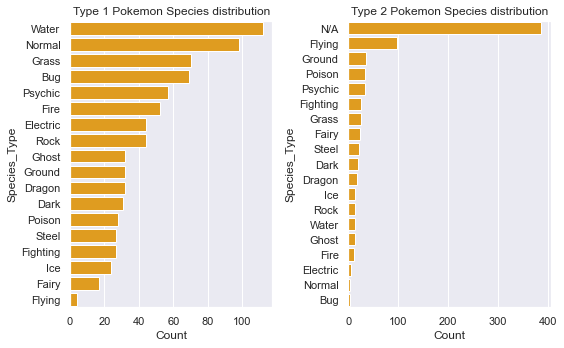

In [87]:
#displaying countplot of the pokemon species by their types.

#setting order of the bar graph
type_order = pokemon_df['Type_1'].value_counts().sort_values(ascending=False).index

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(y='Type_1', data=pokemon_df, color='orange', order=type_order)
plt.xlabel('Count')
plt.ylabel('Species_Type')
plt.title('Type 1 Pokemon Species distribution')

#setting order of the graph

Order = pokemon_df['Type_2'].value_counts().sort_values(ascending=False).index

#defining plotting region and the plot
plt.subplot(1,2,2)
sns.countplot(y='Type_2', data=pokemon_df, color='orange', order=Order)
plt.xlabel('Count')
plt.ylabel('Species_Type')
plt.title('Type 2 Pokemon Species distribution')

plt.tight_layout()


Insights from the plots above:
1. We can confirm from Type 1 barplot that Water is the most common pokemon type garnering 112 participants.
2. Type 2 barplot visualizes the huge number(exactly 386) of unspecified type.
3. The type 2 barplot also characterizes flying as the most common pokemon type with close to 100 participant.

#### Pokemon's Speed

In [88]:
#Adding a new column in the dataframe with Boolean value to categorize fastest pokemons
pokemon_df['Fast']= pokemon_df.Speed > 120

#checking of the column has been created
pokemon_df.head(3)

,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary,Fast
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,49,49,45,65,65,45,318,1,False,False
2,Ivysaur,Grass,Poison,62,63,60,80,80,60,405,1,False,False
3,Venusaur,Grass,Poison,82,83,80,100,100,80,525,1,False,False


In [89]:
#checking how many rows of fast pokemons are there
pokemon_df[pokemon_df.Fast == True].shape

(29, 13)

From the cell above we can see that there are 29 pokemons all having speeds above 120.

,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary,Fast
#,,,,,,,,,,,,,
386,DeoxysSpeed Forme,Psychic,N/A,95,90,180,95,90,50,600,3,True,True
291,Ninjask,Bug,Flying,90,45,160,50,50,61,456,3,False,True
386,DeoxysNormal Forme,Psychic,N/A,150,50,150,150,50,50,600,3,True,True
142,AerodactylMega Aerodactyl,Rock,Flying,135,85,150,70,95,80,615,1,False,True
65,AlakazamMega Alakazam,Psychic,N/A,50,65,150,175,95,55,590,1,False,True


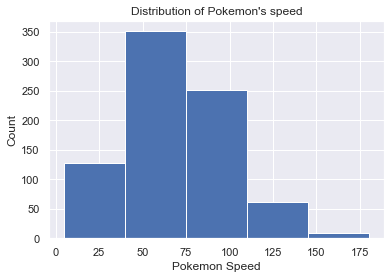

In [90]:
# plotting hist plots to see distribution of the data 
plt.hist(pokemon_df.Speed.dropna(), bins=5)
plt.xlabel('Pokemon Speed')
plt.ylabel('Count')
plt.title("Distribution of Pokemon's speed")


#displaying the top 10 fastest pokemons
pokemon_df.sort_values('Speed', ascending=False).head(5)

 Insights from above, we can conclude the following:
  1. Majority of the pokemons have speeds between 50-100.
  2. There very few pokemons with speed above 150.
  3. There 125 pokemons with speeds between 5-50.
  4. Fastest pokemon is DeoxysSpeed Forme with speed of 180.

#### Pokemon's Attack 

Text(0.5, 1.0, 'Pokemons Attack distribution')

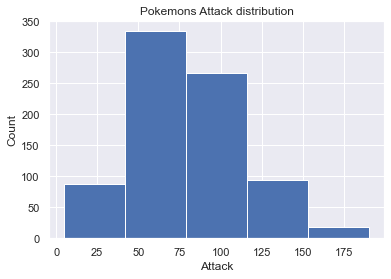

In [91]:
#displaying attacks distribution using histogram.
plt.hist(pokemon_df.Attack.dropna(), bins=5)
plt.xlabel('Attack')
plt.ylabel('Count')
plt.title('Pokemons Attack distribution')

 From the Histogram we can conclude the following:
  1. Most pokemons(app 325) have an attack of between 50-75
  2. Coming in second is approximately 275 pokemons with an attack between 75-125.
  3. Approximately 20 pokemons have an Attack of above 150.
  4. Approximately 75 pokemons have an attack of between 5- 50

#### Pokemons' Total points Distribution

Text(0.5, 1.03, "Distribution of Pokemon's Total Points")

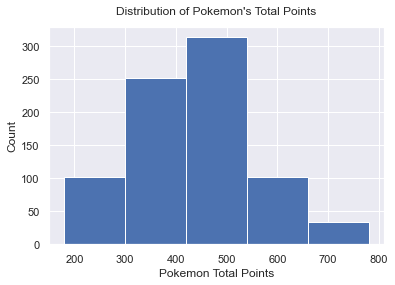

In [92]:
#displaying the distribution of scores 
plt.hist(pokemon_df.Total.dropna(), bins=5)
plt.xlabel('Pokemon Total Points')
plt.ylabel('Count')
plt.title("Distribution of Pokemon's Total Points", y=1.03)


From Pokemon's Total points Histogram plot we can conclude the following:
1. Majority of the pokemons have total points of between 400-500.
2. Approximately 25 pokemons have above 700 points and are in the leading table.
3. Approximately 100 pokemon range in least total points if between 200-300

#### Legendary Distribution


In [93]:
Pokemon_legendary=pokemon_df.groupby('Legendary').size().reset_index().rename(columns = {0:'counts'})
Pokemon_legendary

,Legendary,counts
0,False,735
1,True,65


Text(0.5, 1.0, "Distribution of Pokemons' Legendary")

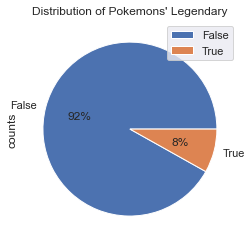

In [94]:
#Defining color palette
palette_color=sns.color_palette('bright')

#Displaying Legendary distribution
Pokemon_legendary.groupby(['Legendary']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%')
plt.legend()
plt.title("Distribution of Pokemons' Legendary")

Insights from the pie chart above:
1. We can see that 92% which represents 735 of the total 800 pokemons are not yet Legendary.
2. Only 65 of the total pokemons' population are legendary represent 8% of the entire population.


#### Generation Distribution.


In [95]:
Pokemon_generation=pokemon_df.groupby('Generation').size().reset_index().rename(columns = {0:'counts'})
Pokemon_generation

,Generation,counts
0,1,166
1,2,106
2,3,160
3,4,121
4,5,165
5,6,82


Text(0.5, 1.03, "Distribution of Pokemons' Generation")

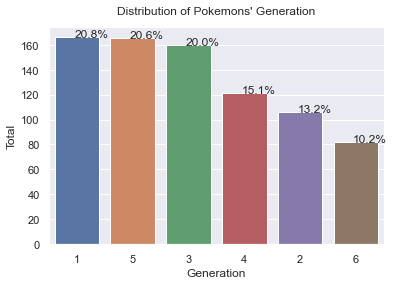

In [96]:
#Defining color palette
palette_color=sns.color_palette('bright')

#defining order of distribution
type_order = pokemon_df.Generation.value_counts().sort_values(ascending=False).index

#Pokemon_generation.groupby(['Generation']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%')
ax=sns.countplot(data=pokemon_df, x='Generation', order=type_order)
plt.xlabel('Generation')
plt.ylabel('Total')
total = len(pokemon_df['Generation'])

#calculating the representative percentages of the Pokemons' Generation Distribution.
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

plt.title("Distribution of Pokemons' Generation", y=1.03)

From the Barchart we can conclude the following:
1. Majority of the pokemons belong to the first generation and represent 20.8% of the population.
2. 6th Generation has the least number of pokemons and represent 10.2% of the pokemons population.

### Inferential Analysis.

#### Qn.1 What are the top 10 Pokemons as per Total points?

In [97]:
#displaying top 10 species with highest total points

Top_10_Pokemon=pokemon_df.sort_values('Total', ascending=False).head(10)

Top_10_Pokemon

,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary,Fast
#,,,,,,,,,,,,,
384,RayquazaMega Rayquaza,Dragon,Flying,180,100,115,180,100,105,780,3,True,False
150,MewtwoMega Mewtwo Y,Psychic,N/A,150,70,140,194,120,106,780,1,True,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,190,100,130,154,100,106,780,1,True,True
382,KyogrePrimal Kyogre,Water,N/A,150,90,90,180,160,100,770,3,True,False
383,GroudonPrimal Groudon,Ground,Fire,180,160,90,150,90,100,770,3,True,False
493,Arceus,Normal,N/A,120,120,120,120,120,120,720,4,True,False
646,KyuremWhite Kyurem,Dragon,Ice,120,90,95,170,100,125,700,5,True,False
646,KyuremBlack Kyurem,Dragon,Ice,170,100,95,120,90,125,700,5,True,False
373,SalamenceMega Salamence,Dragon,Flying,145,130,120,120,90,95,700,3,False,False


- Overall view of the top 10 pokemons
 1. The tope pokemon has 780 points.
 2. Majority of the pokemons are legendary.
 3. Majority of the pokemon are not fast that is their speed do not the 120.
 4. Majority of the pokemons belong to the 3rd generation.
 5. Judging from the type Most top 10 belong to type 1 species.

#### Qn.2 What is the correlation between defense and attack, Sp Attack and Sp. Defense?.

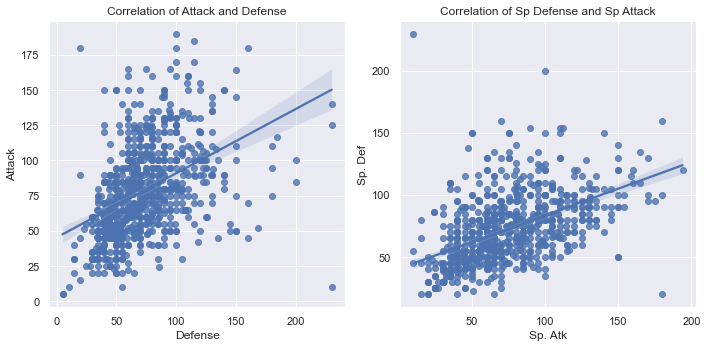

In [98]:
#defining the figure size.
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1);
sns.regplot(data=pokemon_df, y='Attack',x='Defense')
plt.title('Correlation of Attack and Defense')

# Activate the middle subplot
plt.subplot(1, 2, 2);
sns.regplot(data=pokemon_df, y='Sp. Def', x='Sp. Atk')
plt.title('Correlation of Sp Defense and Sp Attack')

# Improve the spacing between subplots
plt.tight_layout()

Interpretation of the regression plots above:
1. Defense and attack regression plots indicate that majority of the pokemon have points ranging between 50-100, hence proving that the Atk/defense ratio is around 1.This is a similar case when it comes to Sp.Atk and Sp.defense regression plots.


#### Qn.3 What is the comparison Attack / Defense ratio of the entire dataset and the top 10 pokemons?

In [99]:
#calculating the Attack/Defense ratio of the entire 800 pokemon population
pokemon_df['Atk. / Def.'] = pokemon_df.Attack / pokemon_df.Defense


#sorting the df max atk/dfs ratio
pokemon_df= pokemon_df.sort_values('Atk. / Def.',ascending = False)

#reindexing the columns
pokemon_df.reindex(columns=['Species', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Total','Atk. / Def.', 'Fast','Generation', 'Legendary'])

#displaying top 5 of the entire dataset
pokemon_df.head(5)


,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary,Fast,Atk. / Def.
#,,,,,,,,,,,,,,
386,DeoxysAttack Forme,Psychic,N/A,180,20,150,180,20,50,600,3,True,True,9.000
318,Carvanha,Water,Dark,90,20,65,65,20,45,305,3,False,False,4.500
15,BeedrillMega Beedrill,Bug,Poison,150,40,145,15,80,65,495,1,False,True,3.750
408,Cranidos,Rock,N/A,125,40,58,30,30,67,350,4,False,False,3.125
319,Sharpedo,Water,Dark,120,40,95,95,40,70,460,3,False,False,3.000


In [100]:
#displaying mean, minimum, maximum and standard deviation of Atk/ Def ratio
display(pokemon_df['Atk. / Def.'].mean())
display(pokemon_df['Atk. / Def.'].min())
display(pokemon_df['Atk. / Def.'].max())
display(pokemon_df['Atk. / Def.'].std())


1.1645466088751784

0.043478260869565216

9.0

0.5526044976174339

#### Calculating the  Attack- defense ratio of the Top_10_ Pokemon

In [101]:
#calculating the Attack/Defense ratio of the top 10 pokemon
Top_10_Pokemon['Atk. / Def.'] = Top_10_Pokemon.Attack / Top_10_Pokemon.Defense

#reindexing the columns
Top_10_Pokemon.reindex(columns=['Species', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Total','Atk. / Def.', 'Fast','Generation', 'Legendary'])
Top_10_Pokemon=Top_10_Pokemon.sort_values('Atk. / Def.',ascending = False)

Top_10_Pokemon.head(5)

,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary,Fast,Atk. / Def.
#,,,,,,,,,,,,,,
150,MewtwoMega Mewtwo Y,Psychic,N/A,150,70,140,194,120,106,780,1,True,True,2.142857
150,MewtwoMega Mewtwo X,Psychic,Fighting,190,100,130,154,100,106,780,1,True,True,1.900000
384,RayquazaMega Rayquaza,Dragon,Flying,180,100,115,180,100,105,780,3,True,False,1.800000
646,KyuremBlack Kyurem,Dragon,Ice,170,100,95,120,90,125,700,5,True,False,1.700000
382,KyogrePrimal Kyogre,Water,N/A,150,90,90,180,160,100,770,3,True,False,1.666667


In [102]:
#displaying mean, max and minimum value of Atk/ Def ratio
display(Top_10_Pokemon['Atk. / Def.'].mean())
display(Top_10_Pokemon['Atk. / Def.'].min())
display(Top_10_Pokemon['Atk. / Def.'].max())
display(Top_10_Pokemon['Atk. / Def.'].std())


1.4749908424908424

0.9666666666666667

2.142857142857143

0.4184050032381054

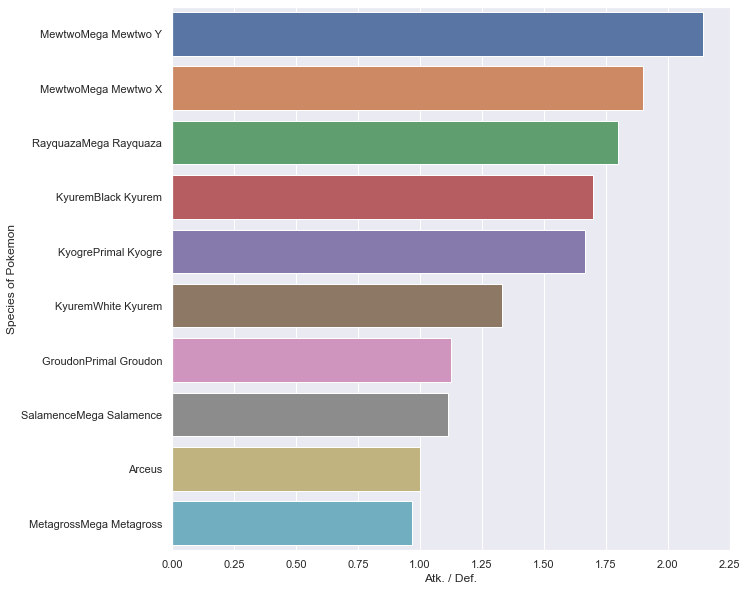

In [103]:
#displaying the species with maximum attack ratio
plt.figure(figsize=(10,10));
sns.barplot(y='Species', x='Atk. / Def.', data=Top_10_Pokemon);
plt.ylabel('Species of Pokemon');


- Insights:
 1. Both dataframes indicate a low Standard deviation showing the values are closely conentrated towards the mean.
 2. Despite the above obeservation, we can aslo see the difference in ranges of values as the entire pokemons Atk/def ratio are spread out between 0 which is the minimum value and 9 which the max value.
 3. On the other hand, the top 10 pokemon Atk/ def range are closely concentrated between 0.9 which is min value and 2.1 which is max value. 
 4. MewtwoMega Mewtwo Y is the pokemon with highest atk/def ratio and has total point of 780 which is the highest in the table.
 

#### Qn. 4 Which are the Top 10 pokemon (having highest Total) with Attack > 100, Defense > 100, HP > 50 and  are Legendary ?

In [104]:
#filtering the dataset as per the requirements stated in the question
Legendary_table = pokemon_df[pokemon_df.Legendary == True]
Legendary_table = Legendary_table[Legendary_table['Attack'] > 100]
Legendary_table = Legendary_table[Legendary_table['Defense'] > 100]
Legendary_table = Legendary_table[Legendary_table['HP'] > 50]

#sorting the record to start with pokemon with highest Total points
Legendary_table.sort_values('Total',ascending=False).head(10)


,Species,Type_1,Type_2,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Total,Generation,Legendary,Fast,Atk. / Def.
#,,,,,,,,,,,,,,
383,GroudonPrimal Groudon,Ground,Fire,180,160,90,150,90,100,770,3,True,False,1.125000
493,Arceus,Normal,N/A,120,120,120,120,120,120,720,4,True,False,1.000000
644,Zekrom,Dragon,Electric,150,120,90,120,100,100,680,5,True,False,1.250000
483,Dialga,Steel,Dragon,120,120,90,150,100,100,680,4,True,False,1.000000
486,Regigigas,Normal,N/A,160,110,100,80,110,110,670,4,True,False,1.454545
383,Groudon,Ground,N/A,150,140,90,100,90,100,670,3,True,False,1.071429
721,Volcanion,Fire,Water,110,120,70,130,90,80,600,6,True,False,0.916667
481,Mesprit,Psychic,N/A,105,105,80,105,105,80,580,4,True,False,1.000000


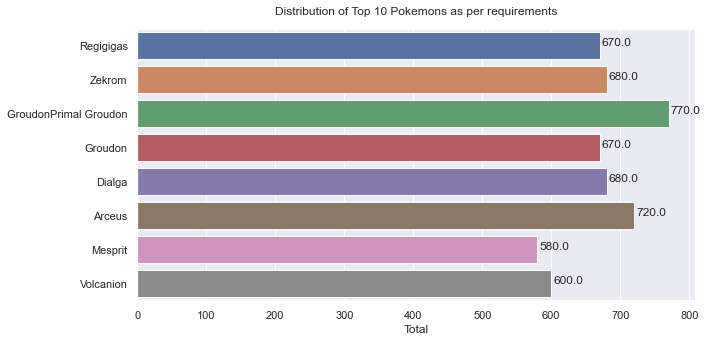

In [105]:
#Defining color palette
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Total',y='Species',data=Legendary_table);
plt.title('Distribution of Top 10 Pokemons as per requirements', y=1.03)
plt.ylabel('')
for t in ax.patches:
        percentage = '{}'.format(t.get_width())
        x = t.get_x() + t.get_width() + 3
        y = t.get_y() + t.get_height()/2
        ax.annotate(percentage, (x, y))

Text(0.5, 1.0, 'Generation Count')

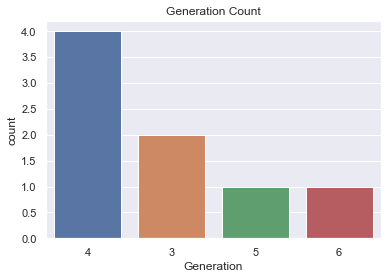

In [106]:
#visualization as per generation
Order=Legendary_table.Generation.value_counts().sort_values(ascending=False).index
sns.countplot(x='Generation', data=Legendary_table, order=Order)
plt.title('Generation Count')

- From the table and the plots we can conclude the following:
 1. GroudonPrimal Groudon is the leading pokemon in the legendary table. 
 2. Pokemons in the table have speeds below 120.
 3. Majority of the pokemons belong to the 4th generation.
 4. Pokemons have a small Atk/ def ratio of between 1.00 - 1.125.
 5. Again Type 1 has majority of the known pokemons in the legendary table. 

### Conclusions:


- After the analysis the following conclusion were made:
 1. Pokemon(s) with highest total points include:  
    -  RayquazaMega Rayquaza  
    - MewtwoMega Mewtwo Y  
    - MewtwoMega Mewtwo x 
 2. The highest recorded speed is 180.
 3. Majority of the pokemon belong to the 1st generation.
 4. 92% of the pokemons population are not legendary while 8% are legendary.
 5. Majority of the pokemon belong to type 1.
 
- After answering the questions this what we can conclude:
 1.  Majority of the pokemons have an attack and defense range of between 50-100.
 2. Similarly, the attack/defense ratio of the pokemons is majorly 1.
 3. The leading pokemons are legendary and belong to the 3rd generation.
 4. There there are 29 pokemons all having speeds above 120.

### Limitations.
 
- The Type 2 columns recorded 386 pokemons which are unspecified or didn't have a distinct name to identify. Hence this present a challenge when it comes to analyzing the pokemons according to their specific types.

#### Analysis by:

Name: Mercy Mwikali

Signature: M. M